# Week 4 - BBC News Classification Kaggle Mini Project
**Name:** SungHak Hong

## Introduction and Problem Description

With this project, I want to seperate BBC news articles into specific categories in given factors. I obtained the dataset from Kaggle (Reference: <https://www.kaggle.com/competitions/learn-ai-bbc/overview>). In this dataset, the following three dataset and data fields are given: 

* **BBC News Train**: The training set of BBC News (1490 records)
* **BBC News Test**: The test set of BBC News (736 records)
* **BBC News Sample Solution**: A sample submission file in the correct format
* **ArticleID**: Article ID unique number given to the record
* **Article**: Test of the header and article
* **Category**: Category of the article (Tech, Business, Sport, Entertainment, and Politics)

During this project, I am planning to produce a analysis of dataset with Exploratory Data Analysis (EDA) procedure, Model Building and Training, and Comparison with supervised learning.

## EDA Procedure
### Import Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
import sklearn.metrics as metrics
import random
import string

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Import Data

In [2]:
sample = pd.read_csv("../Desktop/BBC/BBC_News_Sample_Solution.csv")
train = pd.read_csv("../Desktop/BBC/BBC_News_Train.csv")
test = pd.read_csv("../Desktop/BBC/BBC_News_Test.csv")

First, I looked the dataset we need to train. 

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
print(len(train))
print(train['Category'].unique())

1490
['business' 'tech' 'politics' 'sport' 'entertainment']


Text(0.5, 1.0, 'Counts of Categories in Train')

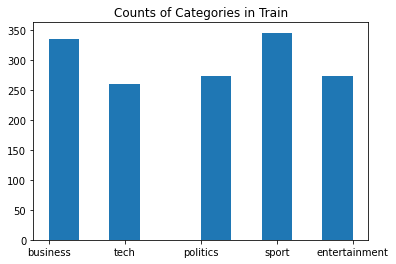

In [5]:
plt.hist(train['Category'])
plt.title("Counts of Categories in Train")

The statement and histogram above represents how many types and counts of categories are there in training dataset. According to the analysis, there are 5 types of categories (business, tech, politics, sports, and entertainments) and there are total of 1490 observations. The sports and business articles are showing more than other three categories, but the counts of all 5 categories seems roughly balanced.  

In [6]:
print(train['ArticleId'])
print(len(train['ArticleId'].unique()))

0       1833
1        154
2       1101
3       1976
4        917
        ... 
1485     857
1486     325
1487    1590
1488    1587
1489     538
Name: ArticleId, Length: 1490, dtype: int64
1490


What about the article ID? the number of article identification are equal and unique itself since they are also represented 1490 amounts of unique article id. Thus, we could conclude that the article id value is not redundant per each articles, so that we could use it as counts of the articles itself.

Next, we need to exclude the outliers. The outliers could affect to the result in training 

(array([919., 482.,  76.,   6.,   3.,   1.,   0.,   2.,   0.,   1.]),
 array([  501. ,  2289.6,  4078.2,  5866.8,  7655.4,  9444. , 11232.6,
        13021.2, 14809.8, 16598.4, 18387. ]),
 <BarContainer object of 10 artists>)

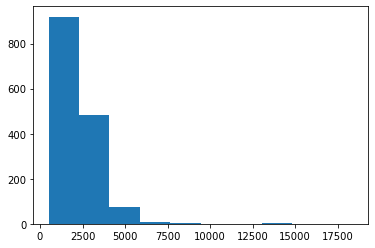

In [7]:
train['length'] = train['Text'].apply(len)
plt.hist(x = train['length'])

In [8]:
train = train[train['length'] < 7500]
len(train)

1482

According to the histogram, most of the length in train data are no more than 7500. Thus, we could consider the length over 7500 can be outliers. So I excluded 18 outliers in training dataset.

## Model Building and Training

In this module, I will use matrix factorization method to discover how the new articles and the labes are accurate.

In [53]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=50, stop_words='english')
X = vect.fit_transform(train.Text)

model = NMF(n_components=5, random_state=5)
model.fit(X)
nmf_features = model.transform(X)

C:\Users\vmfl7\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [54]:
print(X.shape)
print(nmf_features.shape)
print(model.components_.shape)

(1482, 919)
(1482, 5)
(5, 919)


In [55]:
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,000,10,100,11,12,13,14,15,16,17,...,working,works,world,worth,written,wrong,year,years,york,young
0,0.098601,0.024509,0.029764,0.004958,0.000000,0.000000,0.023409,0.006997,0.016887,0.005593,...,0.075061,0.006925,0.031232,0.002961,0.036720,0.080000,0.013212,0.082201,0.003952,0.051506
1,0.021041,0.076507,0.015662,0.029476,0.055476,0.053473,0.032620,0.031999,0.034181,0.086450,...,0.018765,0.008014,0.271449,0.007152,0.011256,0.026413,0.226172,0.124461,0.013613,0.060259
2,0.130636,0.076321,0.066471,0.018205,0.045334,0.013745,0.014668,0.028950,0.015807,0.004975,...,0.070746,0.066393,0.101867,0.029382,0.042561,0.010630,0.100004,0.080283,0.043503,0.028905
3,0.045948,0.043252,0.006116,0.085620,0.037540,0.037349,0.025360,0.015317,0.012810,0.000402,...,0.030779,0.015762,0.048057,0.004159,0.029469,0.003341,0.198324,0.087603,0.054599,0.056834
4,0.185208,0.110741,0.044650,0.076808,0.084319,0.030137,0.045632,0.073936,0.048488,0.040375,...,0.019704,0.000000,0.155678,0.054774,0.001034,0.003038,0.374795,0.141804,0.067130,0.000000


In [66]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
mr            1.331262
labour        0.897330
blair         0.766667
election      0.763722
said          0.661498
party         0.648017
brown         0.535266
government    0.497837
minister      0.446467
howard        0.395097
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
game       0.554853
england    0.513841
win        0.386952
cup        0.343717
said       0.335418
players    0.314006
play       0.309740
team       0.305910
ireland    0.300892
match      0.298904
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
people        0.568749
mobile        0.479070
said          0.430249
music         0.407833
technology    0.382316
users         0.372731
software      0.368475
phone         0.337042
digital       0.324575
microsoft     0.323008
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
film        1.393019
best        0.783338
awards      0.480684

In [69]:
pred_class = pd.DataFrame({'id' : [0, 1, 2, 3, 4], 'category' : ['politics', 'sport', 'tech', 'entertainment', 'business']})

train_pred = pd.DataFrame({'id':pd.DataFrame(nmf_features).idxmax(axis=1)})
train_pred.merge(pred_class, how = 'left', on = 'id').category

0       business
1       business
2       business
3           tech
4       business
          ...   
1477       sport
1478        tech
1479    business
1480        tech
1481        tech
Name: category, Length: 1482, dtype: object

In [70]:
train['Pred'] = train_pred.merge(pred_class, how = 'left', on = 'id').category
(train['Pred'] == train['Category']).mean()

0.8365211085810259


## Comparison with Supervised Learning


In [71]:
text_X = vect.transform(test.Text)
test_nmf_features = model.transform(text_X)
pd.DataFrame(test_nmf_features).idxmax(axis=1)

0      1
1      2
2      1
3      4
4      1
      ..
730    4
731    3
732    2
733    4
734    0
Length: 735, dtype: int64

In [47]:
pred = pd.DataFrame({'id':pd.DataFrame(test_nmf_features).idxmax(axis=1)})
pred.merge(pred_class, how = 'left', on = 'id').category

0              sport
1               tech
2              sport
3           business
4              sport
           ...      
730         business
731    entertainment
732             tech
733         business
734         politics
Name: category, Length: 735, dtype: object

In [72]:
test.drop(['Text'], axis = 1).to_csv('submission.csv', index = False)

In [73]:
test['category'] = pred.merge(pred_class, how = 'left', on = 'id').category

0.8854123400512675


## Conclusion

With building and training the model with matrix factorization method, I was able to obtain the model with accuracy of 0.837. On the other hand, the supervised model has higher accuracy, which is 0.885. With this experiment, we could conclude that the model I used for supervised learning comparison has higher accuracy than the model from matrix factorization method. 